In [58]:
import os, sys
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

warnings.filterwarnings("ignore")

### Read Housing CSV Dataset as a pandas dataframe 

In [20]:
house_df = pd.read_csv("Housing.csv")

In [21]:
house_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [22]:
house_df.info

<bound method DataFrame.info of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no

In [23]:
house_df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


### Describe Price column and identify the quaertile and mean, std, etc..

In [24]:
house_df['price'].describe()

count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64

### Identify Null Values in the dataset

In [52]:
house_df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
total_rooms         0
dtype: int64

### Considering Guestroom as another room to calculate total rooms

In [26]:
house_df["total_rooms"] = house_df["bedrooms"] + house_df["guestroom"].apply(lambda x: 1 if x == 'yes' else 0)

In [27]:
house_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,total_rooms
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,4
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,4
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,3
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,4
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,5


### Convert Categorical Column into Numerical Column for processing

In [53]:
house_df_bool = pd.get_dummies(house_df, columns=['mainroad', 'guestroom', 'basement', 
                                   'hotwaterheating', 'airconditioning', 
                                   'parking', 'prefarea', 'furnishingstatus'], drop_first=True)
house_df_bool.head()

,price,area,bedrooms,bathrooms,stories,total_rooms,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,parking_1,parking_2,parking_3,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,4,True,False,False,False,True,False,True,False,True,False,False
1,12250000,8960,4,4,4,4,True,False,False,False,True,False,False,True,False,False,False
2,12250000,9960,3,2,2,3,True,False,True,False,False,False,True,False,True,True,False
3,12215000,7500,4,2,2,4,True,False,True,False,True,False,False,True,True,False,False
4,11410000,7420,4,1,2,5,True,True,True,False,True,False,True,False,False,False,False


In [54]:
house_df.shape

(545, 14)

In [55]:
house_df_bool.shape

(545, 17)

### Correlation Plot to identify the relations with the features with the Price

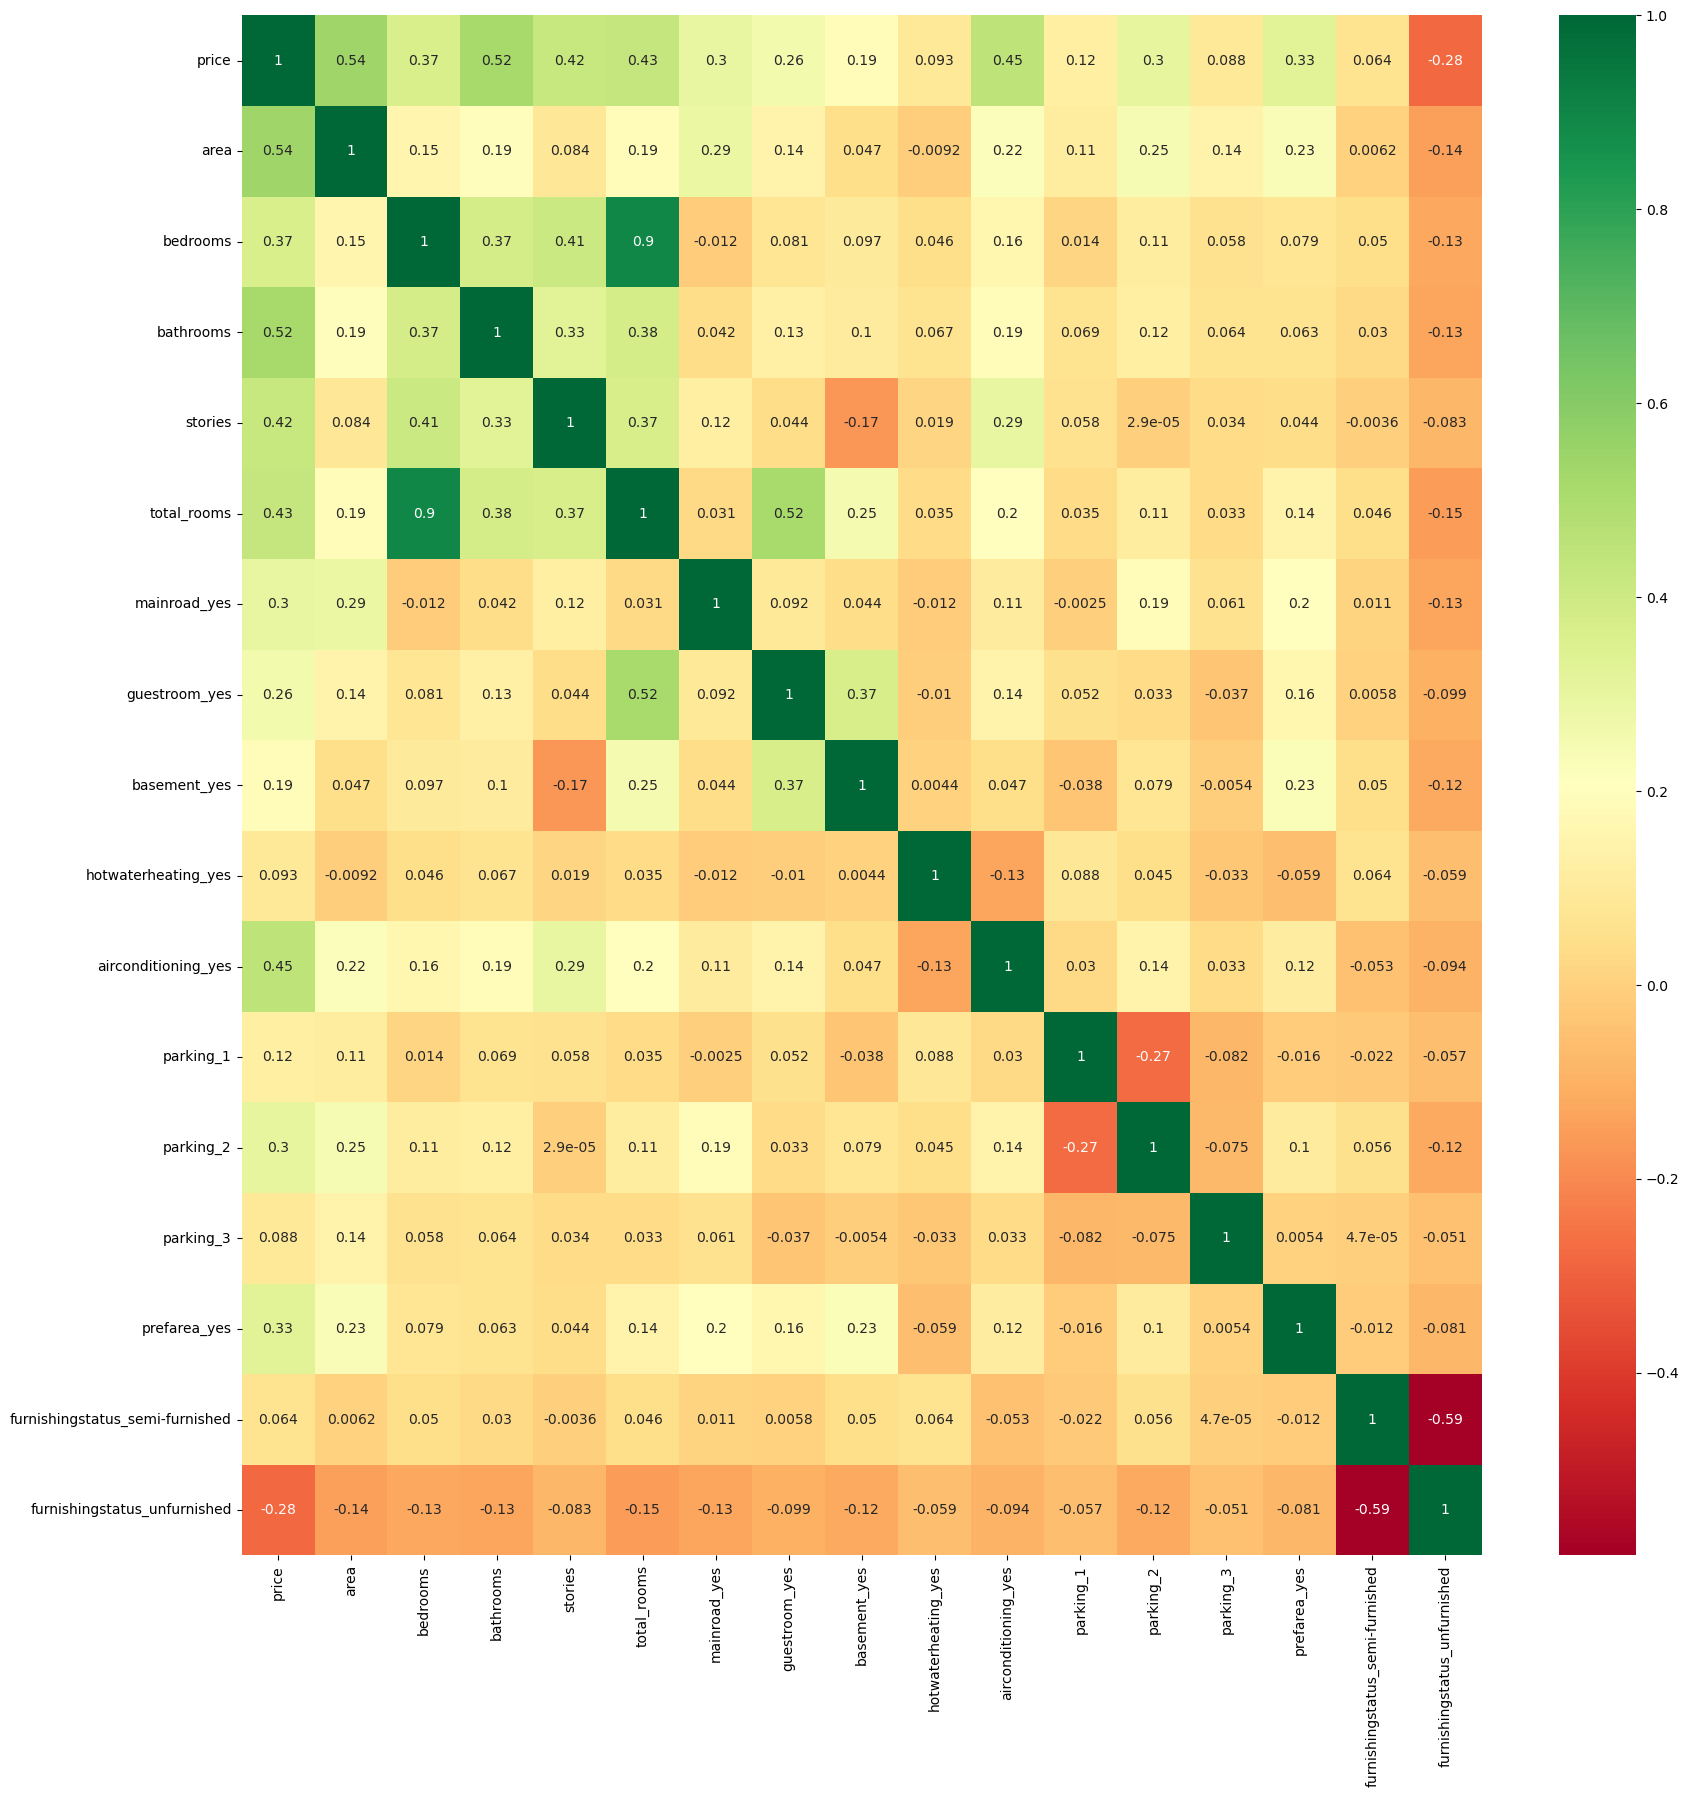

In [31]:
plt.figure(figsize=(20,20))
sns.heatmap(house_df_bool.corr(),annot=True,cmap = "RdYlGn")
plt.show()

### Calculate Feature Importance and Best Features for dependent Variables

In [59]:
# Separate features and target
X = house_df_bool.drop(columns=['price'])
y = house_df_bool['price']

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(exclude=['object']).columns.tolist()

# Gradient Boosting Regressor as the model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model to the training data
gb_model.fit(X_train, y_train)

# Get Feature Importances from the model
importances = gb_model.feature_importances_

# Create a DataFrame to combine feature names and their importance
feature_importance_house_df_bool = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Select important features based on feature importances
selector = SelectFromModel(gb_model, threshold="mean", prefit=True)
X_selected = selector.transform(X_train)

# Get selected feature names
selected_feature_indices = selector.get_support(indices=True)
selected_features = X_train.columns[selected_feature_indices]

print("Feature Importance:")
print(feature_importance_house_df_bool)

Feature Importance:
                            Feature  Importance
0                              area    0.456150
2                         bathrooms    0.175526
9               airconditioning_yes    0.095482
4                       total_rooms    0.051066
3                           stories    0.038397
7                      basement_yes    0.029001
15     furnishingstatus_unfurnished    0.028290
13                     prefarea_yes    0.025044
11                        parking_2    0.016421
1                          bedrooms    0.015693
5                      mainroad_yes    0.015413
8               hotwaterheating_yes    0.014205
12                        parking_3    0.013497
6                     guestroom_yes    0.012639
10                        parking_1    0.010097
14  furnishingstatus_semi-furnished    0.003080


In [60]:
print("Selected Features (Boosting):", selected_features)

Selected Features (Boosting): Index(['area', 'bathrooms', 'airconditioning_yes'], dtype='object')


### Plot the feature importances using seaborn

In [65]:
feature_imp_fig = go.Figure(go.Bar(
    x=feature_importance_df['Importance'],
    y=feature_importance_df['Feature'],
    orientation='h'
))

feature_imp_fig.update_layout(
    title='Feature Importance',
    xaxis_title='Importance Score',
    yaxis_title='Features',
    yaxis=dict(autorange="reversed")
)

feature_imp_fig.show()
feature_imp_fig.write_html('feature_importance.html')

## Scatterplot (Area vs Price)

In [67]:
scatter_fig = px.scatter(house_df_bool, x='area', y='price', 
                         title='Relationship between Area and Price',
                         labels={'area': 'Area (sq ft)', 'price': 'Price'},
                         template='plotly_white')

# Show the plots
scatter_fig.show()
scatter_fig.write_html("area_price_scatter.html")

## Boxplot (Price across Number of Bathrooms)

In [66]:
boxplot_fig = px.box(house_df_bool, x='bathrooms', y='price',
                     title='Boxplot of Price across Different Number of Bathrooms',
                     labels={'bedrooms': 'Number of Bathrooms', 'price': 'Price'},
                     template='plotly_white')

boxplot_fig.show()
boxplot_fig.write_html("bathroom_price_box.html")

## Boxplot (Price across Number of Total Rooms)

In [68]:
boxplot_fig = px.box(house_df_bool, x='total_rooms', y='price',
                     title='Boxplot of Price across Different Number of Total Rooms (Bedrooms + Guestroom)',
                     labels={'total_rooms': 'Number of Total Rooms', 'price': 'Price'},
                     template='plotly_white')

boxplot_fig.show()
boxplot_fig.write_html("total_rooms_price_box.html")

## Bar plot (Average Price per Number of Stories)

In [43]:
bar_fig = px.bar(house_df_bool.groupby('stories')['price'].mean().reset_index(),
                 x='stories', y='price',
                 title='Average Price by Number of Stories',
                 labels={'stories': 'Number of Stories', 'price': 'Average Price'},
                 template='plotly_white')

bar_fig.show()
bar_fig.write_html("area_price_box.html")

## Pie chart (Proportion of Houses with Air Conditioning)

In [48]:
airconditioning_counts = house_df_bool['airconditioning_yes'].value_counts()
pie_fig = px.pie(values=airconditioning_counts, names=airconditioning_counts.index,
                 title='Proportion of Houses with Air Conditioning',
                 template='plotly_white')

pie_fig.show()
pie_fig.write_html("area_price_box.html")

## Future or Further Scope

In [51]:
"""
1. Model Selection for Price Prediction:
2. Feature Engineering:
3. Cross-Validation and Model Optimization
4. Evaluation Metrics

"""

'\n1. Model Selection for Price Prediction:\n2. Feature Engineering:\n3. Cross-Validation and Model Optimization\n4. Evaluation Metrics\n\n'